In [0]:
# -*- coding: utf-8 -*-

import ast


# list of file names containing training data for each letter
files_georgian = ['ა','ბ','გ','დ','ე','ვ','ზ','თ','ი','კ','ლ','მ']
files = ['a', 'b', 'c', 'd', 'e', 'g']


lines = [] #training set data
y_tr = [] #test set data
lines_test = []
y_tst = []
letterCounter = 0
nTh = 0

#import data from dataset
for fname in files:
    with open(fname + '.txt') as f:
        for line in f.readlines():
            try:
                line_obj = ast.literal_eval(line)
            except:
                continue
            if(line[0:4]==r'\x00'):
                line=line[4:]
            if len(line_obj)<8:
                continue
            elif (nTh> 1300 and nTh < 1522):
                lines_test.append(line_obj)
                temp = [0] * len(files)
                temp[letterCounter] = 1
                y_tst.append([temp])
            elif nTh>1522:
                pass
            else:
                lines.append(line_obj)
                temp = [0] * len(files)
                temp[letterCounter] = 1
                y_tr.append([temp])
            nTh += 1
        letterCounter += 1
        print(nTh)
        nTh = 0


#averanges signal, takes every and stride as arguments, determining how many timesteps to averange and what stride should be
def signal_averager(arr, stride=random.randint(1, 3), every=random.randint(2, 3)):
    returnArray = list()
    for innerArray in arr:
        currentIndex=0
        currentList=list()
        while currentIndex<len(innerArray)-every:
            currentAv=0
            for i in range(0, every):
                currentAv+=innerArray[currentIndex+i]
            currentAv=currentAv/every
            currentIndex+=stride
            currentList.append(currentAv)
        returnArray.append(currentList)
    return returnArray
  
#generates numpy array from a string
def get_np(j, lines, average=False):
    i = 0
    vx = []
    vy = []
    vz = []
    ax = []
    ay = []
    az = []
    while i < len(lines[j]):
      vx.append(lines[j][i]['AcX'])
      vy.append(lines[j][i]['AcY'])
      vz.append(lines[j][i]['AcZ'])
      ax.append(lines[j][i]['GyX'])
      ay.append(lines[j][i]['GyY'])
      az.append(lines[j][i]['GyZ'])
      i +=1
    import numpy as np
    np_arr = np.array([vx,vy, vz, ax,ay,az ])
    if average:
        np_arr = np.array(signal_averager([vx,vy, vz, ax,ay,az ]))
    return np_arr


#print number of samples

1649
1525
1615
1539
1571
1522


In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Conv1D

#model definition
model = Sequential()
model.add(LSTM(25, return_sequences=True, stateful=True, input_shape=(None, 6),
         batch_input_shape=(1, None, 6)))
model.add(LSTM(20, recurrent_dropout=0.2))
model.add(Dense(len(files), activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
print(y_tr[0])
for i in range(10):
    print(lines[0][i])
print("\n\n\n\n")
print(y_tr[500])

for i in range(10):
    print(lines[500][i])

[[0, 0, 0, 1, 0]]


<IPython.core.display.Javascript object>


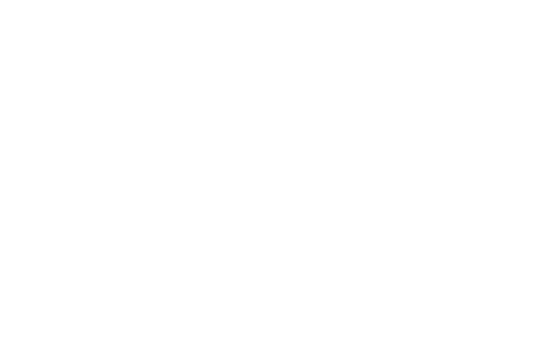

<IPython.core.display.Javascript object>


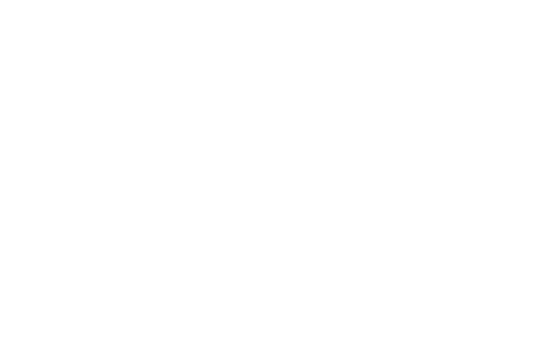

In [0]:
%matplotlib notebook
#3d temperature-graph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

letter_index = 1400 #select letter to plot

def get_data(j,i):
    a = []
    a.append(lines[j][i]['GyX']/10000.0)
    a.append(lines[j][i]['GyY']/10000.0)
    a.append(lines[j][i]['GyZ']/10000.0)
    return a

display_arrays = len(lines[letter_index])-3
#display_arrays = 30
print(y_tr[letter_index])


fig = plt.figure()
origin = [0,0,0]
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = zip(origin,origin,origin) 
map1=plt.cm.get_cmap('seismic')
for i in range(display_arrays):
    p0 = get_data(letter_index,i)    
    #X, Y, Z = zip(origin,origin,origin) 
    U, V, W = zip(p0)
    ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.1, color=map1(i/48))
    origin[0]+=U[0]
    origin[1]+=V[0]
    origin[2]+=W[0]
    X,Y,Z = zip(origin,origin,origin)
lim = 10
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_zlim([-lim,lim])    
plt.show()


In [0]:
#training shuffles characters and passes to the model
import random
j = 0
iter = 0
modeln='abcdeg_l.h5'
avred = False
while(j < len(lines)):
    #avred = not avred
    np_arr = get_np(j,lines, avred)
    
    x_train = np.transpose(np_arr).reshape(1,np_arr.shape[1],6)
    x_train = x_train / 10000.0
    y_train = np.array(y_tr[j])
    model.fit(x_train, y_train, batch_size=1, nb_epoch=1, shuffle=False, verbose=0)
    #print(j)
    j=random.randint(1, len(lines)-1)
    #j=random.randint(1264, 1896)
    if(iter % 1000 == 0):
        model.save(modeln)
        print(iter)
    if (iter % 5000 == 0):
        eval_accuracy(model)
    iter+=1;
    

c:\users\admin-pc\appdata\local\programs\python\python36\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0
[5, 11, 0, 5, 11, 12]
[21, 21, 21, 21, 21, 21]
0.3492063492063492
[0.23809524 0.52380952 0.         0.23809524 0.52380952 0.57142857]
1000
2000
3000
4000
5000
[4, 16, 10, 16, 14, 19]
[21, 21, 21, 21, 21, 21]
0.626984126984127
[0.19047619 0.76190476 0.47619048 0.76190476 0.66666667 0.9047619 ]
6000
7000
8000
9000
10000
[13, 16, 10, 19, 16, 20]
[21, 21, 21, 21, 21, 21]
0.746031746031746
[0.61904762 0.76190476 0.47619048 0.9047619  0.76190476 0.95238095]
11000
12000
13000
14000
15000
[19, 19, 9, 19, 16, 20]
[21, 21, 21, 21, 21, 21]
0.8095238095238095
[0.9047619  0.9047619  0.42857143 0.9047619  0.76190476 0.95238095]
16000
17000
18000
19000
20000
[16, 19, 11, 21, 16, 19]
[21, 21, 21, 21, 21, 21]
0.8095238095238095
[0.76190476 0.9047619  0.52380952 1.         0.76190476 0.9047619 ]
21000
22000
23000
24000
25000
[14, 20, 14, 18, 17, 20]
[21, 21, 21, 21, 21, 21]
0.8174603174603174
[0.66666667 0.95238095 0.66666667 0.85714286 0.80952381 0.95238095]
26000
27000
28000
29000
30000
[16, 19, 18,

KeyboardInterrupt: 

In [0]:
print(iter)

In [0]:
from keras.models import load_model
modeln = 'abcdeg_50.h5'
model = load_model(modeln)
def eval_accuracy(model,avred = False):  
    j = 0
    accurate = 0
    accs = [0]*len(files)
    every = [0]*len(files)

    while(j < len(lines_test)):
        np_arr = get_np(j, lines_test, avred)
        x_train = np.transpose(np_arr).reshape(1,np_arr.shape[1],6)
        x_train = x_train / 10000.0
        y_train = np.array(y_tst[j])
        #model.fit(x_train, y_train, batch_size=1, nb_epoch=1, shuffle=False, verbose=1)
        if (np.argmax(y_train)==np.argmax(model.predict(x_train))):
            accurate+=1
            accs[np.argmax(y_train)]+=1
            #print('true')
        #print(j)
        every[np.argmax(y_train)]+=1
        j+=1
    print(accs)
    print(every)
    print(accurate/float(len(lines_test)))
    print(np.divide(np.array(accs), np.array(every)))
eval_accuracy(model)

[139, 79, 142, 103, 113, 85]
[165, 114, 165, 130, 165, 122]
0.7677119628339141
[0.84242424 0.69298246 0.86060606 0.79230769 0.68484848 0.69672131]


In [0]:
#recall
print(accs)
print(every)
print(np.divide(np.array(accs), np.array(every)))

[135, 49, 60, 46, 71, 35]
[169, 51, 117, 48, 74, 36]
[0.79881657 0.96078431 0.51282051 0.95833333 0.95945946 0.97222222]


In [0]:
#accuracy on test set
from keras.models import load_model

model = load_model(modeln)
 
j = 0
accurate = 0
accs = [0]*len(files)
every = [0]*len(files)
while(j < len(lines)):
    np_arr = get_np(j, lines)
    x_train = np.transpose(np_arr).reshape(1,np_arr.shape[1],6)
    x_train = x_train / 10000.0
    y_train = np.array(y_tr[j])
    #model.fit(x_train, y_train, batch_size=1, nb_epoch=1, shuffle=False, verbose=1)
    if (np.argmax(y_train)==np.argmax(model.predict(x_train))):
        accurate+=1
        accs[np.argmax(y_train)]+=1
        #print('true')
    #print(j)
    every[np.argmax(y_train)]+=1
    j+=1
print(accurate/float(len(lines)))
print(np.divide(np.array(accs), np.array(every)))

0.9490127468132967
[0.96251874 0.96251874 0.91604198 0.97901049 0.92203898 0.95195195]


In [0]:
every

[667, 667, 667, 667, 667, 666]